# Machine Learning on GenePy

In [3]:
import get_data 
import get_patient
import get_PPI
import pandas as pd
import numpy as np
import matplotlib as plt


In [4]:
from get_data import genepy_df, genepy_normalized, genepy_norm_loeuf, patient_phenotype


### enerate ML data set

In [18]:
dfs = [genepy_norm_loeuf, patient_phenotype]
ML_data = pd.concat(dfs, axis = 1)
ML_data

,A1BG,A1CF,A2M,A2ML1,A3GALT2,A4GALT,A4GNT,AAAS,AACS,AADAC,...,ZWINT,ZXDA,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3,gender,Diagnosis
AP0013,0.097623,0.027245,0.107498,0.011378,0.041579,0.028535,0.055493,0.000000,0.000000,0.000000,...,0.010998,0.0,0.008628,0.000000,0.044287,0.000000,0.340699,0.000000,female,CD
AP0030,0.134882,0.000000,0.018830,0.064448,0.000000,0.015138,0.022460,0.018639,0.000000,0.004263,...,0.007656,0.0,0.009848,0.000000,0.030830,0.000000,0.284207,0.000000,female,CD
AP0045,0.107196,0.000000,0.025388,0.034014,0.000000,0.007506,0.030282,0.000000,0.000000,0.121555,...,0.010323,0.0,0.008098,0.009520,0.000000,0.000000,0.014009,0.233638,male,UC
AP0046,0.179652,0.000000,0.025081,0.118953,0.014841,0.007415,0.029915,0.024826,0.000000,0.000000,...,0.010197,0.0,0.008000,0.009405,0.048775,0.000000,0.013839,0.000000,female,UC
AP0055,0.091878,0.000000,0.038677,0.072722,0.008690,0.007527,0.080610,0.025200,0.000000,0.121888,...,0.010351,0.0,0.008120,0.009546,0.000000,0.000000,0.559744,0.234278,female,NOT_IBD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SORL0038,0.080994,0.046982,0.041727,0.116409,0.000000,0.023674,0.026768,0.000000,0.061914,0.209816,...,0.004534,0.0,0.055944,0.008415,0.000000,0.000000,0.000000,0.000000,male,UC
SORL0039,0.085174,0.000000,0.067480,0.076095,0.000000,0.024896,0.028149,0.000000,0.000000,0.112994,...,0.000000,0.0,0.091930,0.011336,0.045896,0.022600,0.000000,0.000000,female,CD
SORL0040,0.001160,0.000000,0.031980,0.076830,0.007185,0.006223,0.025107,0.040578,0.000000,0.004765,...,0.008558,0.0,0.000000,0.000000,0.034464,0.082463,0.327945,0.000000,female,UC
SORL0041,0.001321,0.000000,0.000000,0.065988,0.008187,0.007091,0.049207,0.000000,0.000000,0.005429,...,0.026767,0.0,0.012495,0.011521,0.046645,0.000000,0.288868,0.000000,female,UC


### Binarize Diagnosis label

In [21]:
from sklearn.preprocessing import LabelBinarizer


arr = ML_data['Diagnosis'].values.reshape(-1,1)
enc = LabelBinarizer()
enc.fit_transform(arr)

ML_data['Diagnosis'] = enc.fit_transform(arr)
ML_data

,A1BG,A1CF,A2M,A2ML1,A3GALT2,A4GALT,A4GNT,AAAS,AACS,AADAC,...,ZWINT,ZXDA,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3,gender,Diagnosis
AP0013,0.097623,0.027245,0.107498,0.011378,0.041579,0.028535,0.055493,0.000000,0.000000,0.000000,...,0.010998,0.0,0.008628,0.000000,0.044287,0.000000,0.340699,0.000000,female,1
AP0030,0.134882,0.000000,0.018830,0.064448,0.000000,0.015138,0.022460,0.018639,0.000000,0.004263,...,0.007656,0.0,0.009848,0.000000,0.030830,0.000000,0.284207,0.000000,female,1
AP0045,0.107196,0.000000,0.025388,0.034014,0.000000,0.007506,0.030282,0.000000,0.000000,0.121555,...,0.010323,0.0,0.008098,0.009520,0.000000,0.000000,0.014009,0.233638,male,0
AP0046,0.179652,0.000000,0.025081,0.118953,0.014841,0.007415,0.029915,0.024826,0.000000,0.000000,...,0.010197,0.0,0.008000,0.009405,0.048775,0.000000,0.013839,0.000000,female,0
AP0055,0.091878,0.000000,0.038677,0.072722,0.008690,0.007527,0.080610,0.025200,0.000000,0.121888,...,0.010351,0.0,0.008120,0.009546,0.000000,0.000000,0.559744,0.234278,female,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SORL0038,0.080994,0.046982,0.041727,0.116409,0.000000,0.023674,0.026768,0.000000,0.061914,0.209816,...,0.004534,0.0,0.055944,0.008415,0.000000,0.000000,0.000000,0.000000,male,0
SORL0039,0.085174,0.000000,0.067480,0.076095,0.000000,0.024896,0.028149,0.000000,0.000000,0.112994,...,0.000000,0.0,0.091930,0.011336,0.045896,0.022600,0.000000,0.000000,female,1
SORL0040,0.001160,0.000000,0.031980,0.076830,0.007185,0.006223,0.025107,0.040578,0.000000,0.004765,...,0.008558,0.0,0.000000,0.000000,0.034464,0.082463,0.327945,0.000000,female,0
SORL0041,0.001321,0.000000,0.000000,0.065988,0.008187,0.007091,0.049207,0.000000,0.000000,0.005429,...,0.026767,0.0,0.012495,0.011521,0.046645,0.000000,0.288868,0.000000,female,0


### Split Training and testing data

In [26]:
from sklearn.model_selection import train_test_split

training, testing = train_test_split(ML_data, test_size=0.2, random_state=25)

print(f"Training examples: {training.shape[0]}")
print(f"Testing examples: {testing.shape[0]}")

Training examples: 868
Tesing examples: 218


### Training data

In [31]:
X = ML_data.drop(columns=['gender','Diagnosis']).values
y = ML_data['Diagnosis'].values
f"shapes of X={X.shape} y={y.shape}, # CD cases = {y.sum()}"

'shapes of X=(1086, 16794) y=(1086,), # CD cases = 681'

### ML Model

In [32]:
from sklearn.linear_model import LogisticRegression

mod = LogisticRegression(max_iter=1000)
mod.fit(X,y).predict(X).sum()
pred = mod.predict(X)

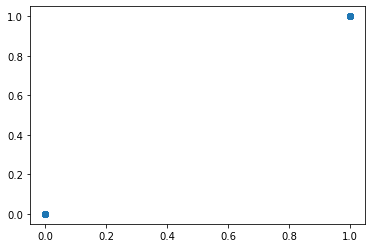

In [33]:
import matplotlib.pylab as plt

plt.scatter(pred, y)

In [36]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

### Pipeline

In [44]:
pipe = Pipeline([
    ("model", LogisticRegression())
])
# pipe.get_params()

### Model

In [53]:
grid = GridSearchCV(
    estimator=LogisticRegression(max_iter=1000),
    param_grid={'class_weight': [{0:1, 1:v} for v in range(1,4)]},
    cv=4,
    n_jobs=-1
)
grid.fit(X,y)

GridSearchCV(cv=4, estimator=LogisticRegression(max_iter=1000), n_jobs=-1,
             param_grid={'class_weight': [{0: 1, 1: 1}, {0: 1, 1: 2},
                                          {0: 1, 1: 3}]})

In [54]:
pd.DataFrame(grid.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_class_weight,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
0,24.786695,0.646169,0.038610,0.002990,"{0: 1, 1: 1}","{'class_weight': {0: 1, 1: 1}}",0.525735,0.507353,0.568266,0.560886,0.540560,0.025016,3
1,27.639354,1.069456,0.033608,0.004716,"{0: 1, 1: 2}","{'class_weight': {0: 1, 1: 2}}",0.533088,0.507353,0.583026,0.571956,0.548856,0.030300,1
2,12.041148,1.363002,0.011876,0.004958,"{0: 1, 1: 3}","{'class_weight': {0: 1, 1: 3}}",0.529412,0.503676,0.586716,0.564576,0.546095,0.031895,2


In [51]:
pipe.cv_results_pd.DataFrame(mod.cv_results_)

/Users/tomdoyle/opt/anaconda3/envs/Research_Project/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


AttributeError: 'GridSearchCV' object has no attribute 'cv_results_'